In [1]:
import re
import os
import time
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.compat.v1 import ConfigProto, InteractiveSession
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset/corpusfinal.csv')
dataset['Articles'] = dataset['document']
dataset["Summaries"] = dataset["summary"]

In [3]:
contractions_dictionary = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [4]:
from string import digits
import re

def Filter(text):
#     pattern = r'[0-9]'

# # Match all digits in the string and replace them with an empty string
#     text = re.sub(pattern, '', text)
#     remove_digits = str.maketrans('', '', digits)
#     text = text.translate(remove_digits)
    text = str(text)
    text=' '.join([contractions_dictionary[i] if i in contractions_dictionary.keys() else i for i in text.split()])
    text=re.sub(r'\(.*\)',"",text)
    text=re.sub("'s","",text)
    text=re.sub('"','',text)
    text=' '.join([i for i in text.split() if i.isalpha()])
    text=re.sub('[^a-zA-Z]'," ",text)
    text=text.lower()
    
    return text

dataset['Articles'] = dataset['Articles'].apply(Filter)
dataset['Summaries'] = dataset['Summaries'].apply(Filter)

In [5]:
print(dataset.shape)
dataset.head()

(1977, 7)


,Unnamed: 0,document,paper,abs_summary,ext_summary,Articles,Summaries
0,0,The ninth International Conference on Forest F...,IX International Conference on Forest Fire Res...,This special issue of the International Journa...,The ninth International Conference on Forest F...,the ninth international conference on forest f...,the ninth international conference on forest f...
1,1,Swedish wildfires are handled by multipurpose ...,Perception of wildfire behaviour potential amo...,Swedish wildfires are handled by multipurpose ...,Swedish wildfires are handled by multipurpose ...,swedish wildfires are handled by multipurpose ...,swedish wildfires are handled by multipurpose ...
2,2,"In Pedrógão Grande on 17 June 2017, two fire f...",Slope effect on junction fire with two non-sym...,"In Pedrógão Grande on 17 June 2017, two fire f...","In Pedrógão Grande on 17 June 2017, two fire f...",in pedr g o grande on june two fire fronts mer...,in pedr g o grande on june two fire fronts mer...
3,3,Junction fires occur when two fire fronts merg...,Physics-based modelling of junction fires: par...,The rate of spread (ROS) and heat release rate...,Junction fires occur when two fire fronts merg...,junction fires occur when two fire fronts the ...,junction fires occur when two fire fronts twen...
4,4,Lightning is the most common origin of natural...,Modelling the daily probability of lightning-c...,Lightning is the most common origin of natural...,Lightning is the most common origin of natural...,lightning is the most common origin of natural...,lightning is the most common origin of natural...


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 3000
embedding_dim = 100
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 1000

articles_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
articles_tokenizer.fit_on_texts(dataset['Articles'])

summaries_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
summaries_tokenizer.fit_on_texts(dataset['Summaries'])

# word_index = tokenizer.word_index

training_sequences = articles_tokenizer.texts_to_sequences(dataset['Articles'])
training_x_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_sequences = summaries_tokenizer.texts_to_sequences(dataset['Summaries'])
training_y_padded = pad_sequences(training_sequences, maxlen=30, padding=padding_type, truncating=trunc_type)



In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
training_x_padded.shape

(1977, 100)

In [9]:
NUM_TRAIN = 2224
article_map = dict(map(reversed, articles_tokenizer.word_index.items()))
summaries_map = dict(map(reversed, summaries_tokenizer.word_index.items()))

article = np.zeros((NUM_TRAIN,100,vocab_size))
summ = np.zeros((NUM_TRAIN,30,vocab_size))
summ_target = np.zeros((NUM_TRAIN,30,vocab_size))
for i,sequence in enumerate(training_x_padded):
    for j,word in enumerate(sequence):
        article[i,j,word ] = 1
        
for i,sequence in enumerate(training_y_padded):
    for j,word in enumerate(sequence):
        summ[i,j,word] = 1
        if j>0:
            summ_target[i,j-1,word] = 1


In [10]:
training_x = article
training_y = summ
training_y_target = summ_target
# testing_x_padded = np.array(testing_x_padded)
# testing_y_padded = np.array(testing_y_padded)

print(training_x.shape)
print(training_y.shape)
print(training_y_target.shape)
# print(testing_x_padded.shape)
# print(testing_y_padded.shape)

(2224, 100, 3000)
(2224, 30, 3000)
(2224, 30, 3000)


In [11]:
encoder_inputs = tf.keras.layers.Input(shape=(None, vocab_size))
encoder = tf.keras.layers.LSTM(embedding_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

encoder_states = [state_h, state_c]


decoder_inputs = tf.keras.layers.Input(shape=(None, vocab_size))
decoder_lstm = tf.keras.layers.LSTM(embedding_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = tf.keras.layers.Dense(vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model = tf.keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, 3000)  0           []                               
                                ]                                                                 
                                                                                                  
 input_2 (InputLayer)           [(None, None, 3000)  0           []                               
                                ]                                                                 
                                                                                                  
 lstm (LSTM)                    [(None, 100),        1240400     ['input_1[0][0]']                
                                 (None, 100),                                                 

In [12]:

model.fit([training_x,training_y],training_y_target,
          epochs=300,
          batch_size=64,
          callbacks = [tf.keras.callbacks.CSVLogger('./training.csv')]
          )

Epoch 1/300
35/35 [==============================] - 13s 89ms/step - loss: 6.2702 - accuracy: 0.0247
Epoch 2/300
35/35 [==============================] - 4s 104ms/step - loss: 5.1894 - accuracy: 0.0464
Epoch 3/300
35/35 [==============================] - 4s 102ms/step - loss: 5.1698 - accuracy: 0.0465
Epoch 4/300
35/35 [==============================] - 3s 79ms/step - loss: 5.1684 - accuracy: 0.0456
Epoch 5/300
35/35 [==============================] - 3s 79ms/step - loss: 5.1677 - accuracy: 0.0457
Epoch 6/300
35/35 [==============================] - 3s 81ms/step - loss: 5.1664 - accuracy: 0.0467
Epoch 7/300
35/35 [==============================] - 4s 124ms/step - loss: 5.1648 - accuracy: 0.0472
Epoch 8/300
35/35 [==============================] - 4s 116ms/step - loss: 5.1650 - accuracy: 0.0461
Epoch 9/300
35/35 [==============================] - 3s 84ms/step - loss: 5.1625 - accuracy: 0.0457
Epoch 10/300
35/35 [==============================] - 3s 81ms/step - loss: 5.1605 - accuracy: 0

In [13]:
model.save('/content/drive/MyDrive/dataset/model.h5')

model.save_weights('./my_checkpoint')


encoder_model = tf.keras.Model(encoder_inputs, encoder_states)
decoder_state_input_h = tf.keras.layers.Input(shape=(embedding_dim,))
decoder_state_input_c = tf.keras.layers.Input(shape=(embedding_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = tf.keras.Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

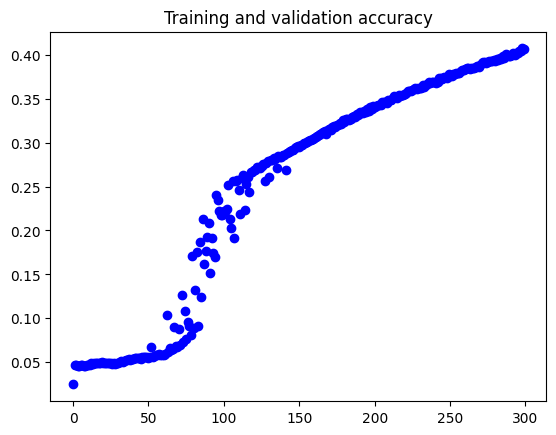

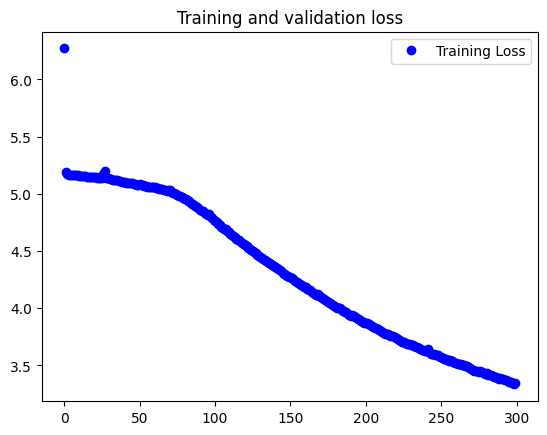

In [14]:
## Visualising the Accuracy and loss plots

callback_csv = pd.read_csv('./training.csv')
acc = callback_csv['accuracy']
loss = callback_csv['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')

plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')

plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:

#Define Decode Sequence
def decode_sequence(input_seq):
    #Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    #Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, 3000))
    #Get the first character of target sequence with the start character.
    target_seq[0, 0, summaries_tokenizer.word_index['<OOV>']] = 1.

    #Sampling loop for a batch of sequences
    #(to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        #Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = summaries_map[sampled_token_index]
        decoded_sentence += ' '+ sampled_char
        
        #Exit condition: either hit max length
        #or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > 70):
            stop_condition = True

        #Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, 3000))
        target_seq[0, 0, sampled_token_index] = 1.

        #Update states
        states_value = [h, c]

    return decoded_sentence

In [16]:
for seq_index in range(10):
    input_seq = training_x[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print('-')
    print('Input sentence:', dataset['Articles'][seq_index])
    print('Decoded sentence:', decoded_sentence)

1/1 [==============================] - 0s 20ms/step
-
Input sentence: the ninth international conference on forest fire together with the international wildland fire safety summit was held in november this joint conference brought together several hundred presentations in the field of wildfire this special issue of the international journal of wildland fire includes several papers describing work presented at the due to the large number and variety of papers the special issue is being published in several part of the special issue was in january with a set of eight this foreword to part of the special issue introduces new papers on various topics that modelling of ignition fire behaviour wildfire hazard fire management imagery and and all papers in the special issue are published open
Decoded sentence:  fire danger and the <OOV> are <OOV> to the <OOV> of fire behaviour and
1/1 [==============================] - 0s 23ms/step
-
Input sentence: swedish wildfires are handled by multipurpos

In [17]:
encoder_model.save('/content/drive/MyDrive/dataset/encoder.h5')
decoder_model.save('/content/drive/MyDrive/dataset/decoder.h5')